In [26]:
import matplotlib.pyplot as plt
import requests, pandas as pd, pycountry


In [27]:
list(pycountry.countries)

[Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', flag='🇦🇮', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', flag='🇦🇽', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', flag='🇦🇱', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', flag='🇦🇩', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', flag='🇦🇪', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', flag='🇦🇷', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', flag='🇦🇲', 

In [30]:
country_name = ['Germany', 'Spain', 'United States', 'France', 'Italy']
country_codes = [pycountry.countries.get(name=country).alpha_3 for country in country_name]
print(country_codes)

['DEU', 'ESP', 'USA', 'FRA', 'ITA']


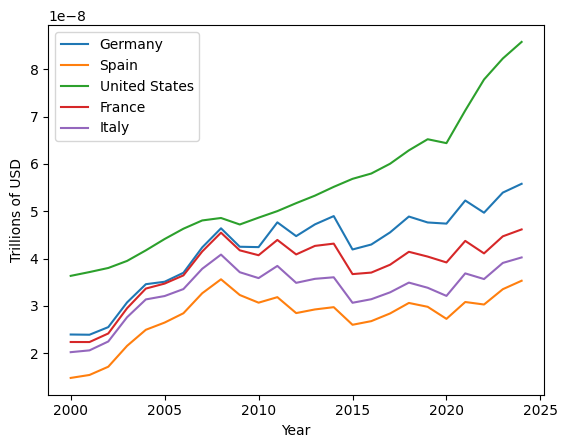

In [38]:
f, ax = plt.subplots()

for country in country_codes:
    start = 2000
    end = 2024

    indicator  = 'NY.GDP.PCAP.CD'
    
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}"
    params = {"date": f"{start}:{end}", "format": "json", "per_page": 1000}

    r = requests.get(url, params=params)
    r.raise_for_status()
    js = r.json()
    js
    records = [(int(item['date']), item['value']) for item in js[1] if item.get('value') is not None]
    df = pd.DataFrame(records, columns=["year", "gdp"]).set_index("year").sort_index()

    ax.plot(df.index, df['gdp'] / 1_000_000_000_000)
    # ax.set_title(f"GDP of {name.title()} (in Trillions USD)")   
    ax.set_ylabel("Trillions of USD")
    ax.set_xlabel("Year")
    
    ax.legend(country_name)
plt.show()
